# Hands-On: Ekstraksi dan Transformasi Data Sensor dengan Pandas

## Deskripsi
Tutorial ini akan memandu Anda melalui proses **Extract, Transform, Load (ETL)** untuk data sensor menggunakan Python Pandas. Anda akan belajar:

- 🔄 **Ekstraksi**: Membaca data dari berbagai format (CSV, Excel, JSON)
- 🧹 **Transformasi**: Pembersihan, preprocessing, dan feature engineering
- 💾 **Loading**: Menyimpan hasil ke berbagai format output

## Dataset
Data yang digunakan adalah simulasi pembacaan sensor IoT yang mencakup:
- **Suhu** (°C)
- **Kelembaban** (%)  
- **Tekanan Atmosfer** (hPa)
- **Kualitas Udara** (AQI)

## Prerequisites
Pastikan Anda sudah menginstall packages yang dibutuhkan:
```bash
pip install pandas numpy matplotlib seaborn openpyxl plotly
```

## 1. Import Required Libraries
Mari mulai dengan mengimport semua library yang diperlukan untuk proses ETL data sensor.

In [1]:
# Import libraries untuk data manipulation dan analysis
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Libraries untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style untuk plot
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Konfigurasi pandas display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Libraries berhasil diimport!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ Libraries berhasil diimport!
Pandas version: 2.3.1
NumPy version: 2.2.6


## 2. Generate Sample Data (Opsional)
Jika belum ada data sample, jalankan script berikut untuk generate data sensor simulasi.

In [2]:
# Jalankan script untuk generate sample data
import subprocess
import sys

try:
    result = subprocess.run([sys.executable, 'scripts/generate_sample_data.py'], 
                          capture_output=True, text=True, cwd='/Users/ekosakti/Code/PID/ETL-Pandas')
    print("📊 Sample data generation:")
    print(result.stdout)
    if result.stderr:
        print("⚠️ Warnings/Errors:")
        print(result.stderr)
except Exception as e:
    print(f"❌ Error running script: {e}")
    print("💡 Silakan jalankan secara manual: python scripts/generate_sample_data.py")

📊 Sample data generation:
Generating sensor data...
Generated 14472 records
Date range: 2024-01-01 00:00:00 to 2024-02-29 23:00:00
Sensors: 10
Data berhasil disimpan dalam berbagai format:
- sensor_data_main.csv
- sensor_data_monthly.xlsx
- sensor_config.json
- sensor_data_semicolon.csv

Data summary:
                           timestamp  ...  air_quality_aqi
count                          14472  ...     14472.000000
mean   2024-01-30 23:31:31.542288384  ...        57.523217
min              2024-01-01 00:00:00  ...         0.000000
25%              2024-01-16 00:00:00  ...        43.400000
50%              2024-01-30 23:00:00  ...        55.800000
75%              2024-02-15 00:00:00  ...        70.500000
max              2024-02-29 23:00:00  ...       128.400000
std                              NaN  ...        19.804855

[8 rows x 5 columns]



## 3. Load Sensor Data (EXTRACT)
Mari mulai proses ekstraksi data dari berbagai sumber dan format yang berbeda.

In [3]:
# 3.1 Load data dari CSV
print("🔄 Loading data dari berbagai format...")

# Load main CSV data
try:
    df_main = pd.read_csv('data/raw/sensor_data_main.csv')
    print(f"✅ CSV Main Data: {df_main.shape[0]} rows, {df_main.shape[1]} columns")
except FileNotFoundError:
    print("❌ File sensor_data_main.csv tidak ditemukan. Jalankan generate_sample_data.py terlebih dahulu.")
    df_main = pd.DataFrame()

# Load CSV dengan separator semicolon
try:
    df_semicolon = pd.read_csv('data/raw/sensor_data_semicolon.csv', sep=';')
    print(f"✅ CSV Semicolon Data: {df_semicolon.shape[0]} rows, {df_semicolon.shape[1]} columns")
except FileNotFoundError:
    print("❌ File sensor_data_semicolon.csv tidak ditemukan.")
    df_semicolon = pd.DataFrame()

# Load Excel data
try:
    excel_file = pd.ExcelFile('data/raw/sensor_data_monthly.xlsx')
    print(f"✅ Excel file dengan sheets: {excel_file.sheet_names}")
    
    df_jan = pd.read_excel('data/raw/sensor_data_monthly.xlsx', sheet_name='January')
    df_feb = pd.read_excel('data/raw/sensor_data_monthly.xlsx', sheet_name='February')
    print(f"   - January: {df_jan.shape[0]} rows")
    print(f"   - February: {df_feb.shape[0]} rows")
except FileNotFoundError:
    print("❌ File sensor_data_monthly.xlsx tidak ditemukan.")
    df_jan = df_feb = pd.DataFrame()

# Load JSON config
try:
    with open('data/raw/sensor_config.json', 'r') as f:
        sensor_config = json.load(f)
    print(f"✅ JSON Config: {len(sensor_config)} sensor configurations loaded")
except FileNotFoundError:
    print("❌ File sensor_config.json tidak ditemukan.")
    sensor_config = []

🔄 Loading data dari berbagai format...
✅ CSV Main Data: 14472 rows, 8 columns
✅ CSV Semicolon Data: 1000 rows, 8 columns
✅ Excel file dengan sheets: ['January', 'February']
   - January: 7479 rows
   - February: 6993 rows
✅ JSON Config: 10 sensor configurations loaded


## 4. Data Exploration and Information (EXAMINE)
Sebelum melakukan transformasi, mari kita explore dan pahami struktur data yang telah dimuat.

In [4]:
# 4.1 Basic Information
if not df_main.empty:
    print("📊 DATASET OVERVIEW")
    print("=" * 50)
    print(f"Shape: {df_main.shape}")
    print(f"Memory usage: {df_main.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print()
    
    print("📋 COLUMN INFO")
    print("=" * 50)
    print(df_main.info())
    print()
    
    print("🔢 BASIC STATISTICS")
    print("=" * 50)
    print(df_main.describe())
    print()
    
    print("👀 SAMPLE DATA")
    print("=" * 50)
    print(df_main.head())
    
else:
    print("❌ Data utama kosong. Pastikan file CSV sudah di-generate.")

📊 DATASET OVERVIEW
Shape: (14472, 8)
Memory usage: 4.21 MB

📋 COLUMN INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14472 entries, 0 to 14471
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            14472 non-null  object 
 1   sensor_id            14472 non-null  object 
 2   location             14472 non-null  object 
 3   temperature_celsius  14209 non-null  float64
 4   humidity_percent     14051 non-null  float64
 5   pressure_hpa         14472 non-null  float64
 6   air_quality_aqi      14472 non-null  float64
 7   status               14472 non-null  object 
dtypes: float64(4), object(4)
memory usage: 904.6+ KB
None

🔢 BASIC STATISTICS
       temperature_celsius  humidity_percent  pressure_hpa  air_quality_aqi
count             14209.00          14051.00      14472.00         14472.00
mean                 25.52             77.40       1013.21            57.52
std        

In [5]:
# 4.2 Data Quality Assessment
if not df_main.empty:
    print("🔍 DATA QUALITY ASSESSMENT")
    print("=" * 50)
    
    # Missing values
    missing_data = df_main.isnull().sum()
    missing_percent = (missing_data / len(df_main)) * 100
    
    quality_df = pd.DataFrame({
        'Column': missing_data.index,
        'Missing_Count': missing_data.values,
        'Missing_Percent': missing_percent.values,
        'Data_Type': df_main.dtypes.values
    })
    
    print("📊 Missing Values Analysis:")
    print(quality_df[quality_df['Missing_Count'] > 0])
    print()
    
    # Duplicates
    duplicates = df_main.duplicated().sum()
    print(f"🔁 Duplicate rows: {duplicates}")
    
    # Unique values per column
    print("\n🏷️ Unique Values per Column:")
    for col in df_main.columns:
        unique_count = df_main[col].nunique()
        print(f"   {col}: {unique_count} unique values")
    
    # Data range validation
    print("\n📏 Data Range Validation:")
    numeric_cols = df_main.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if col != 'sensor_id':
            min_val = df_main[col].min()
            max_val = df_main[col].max()
            print(f"   {col}: {min_val:.2f} to {max_val:.2f}")
            
            # Check for obvious outliers (beyond realistic sensor ranges)
            if 'temperature' in col:
                outliers = df_main[(df_main[col] < -50) | (df_main[col] > 60)][col].count()
                print(f"      Potential outliers (< -50°C or > 60°C): {outliers}")
            elif 'humidity' in col:
                outliers = df_main[(df_main[col] < 0) | (df_main[col] > 100)][col].count()
                print(f"      Potential outliers (< 0% or > 100%): {outliers}")
            elif 'pressure' in col:
                outliers = df_main[(df_main[col] < 900) | (df_main[col] > 1100)][col].count()
                print(f"      Potential outliers (< 900 hPa or > 1100 hPa): {outliers}")
else:
    print("❌ Data utama kosong untuk quality assessment.")

🔍 DATA QUALITY ASSESSMENT
📊 Missing Values Analysis:
                Column  Missing_Count  Missing_Percent Data_Type
3  temperature_celsius            263             1.82   float64
4     humidity_percent            421             2.91   float64

🔁 Duplicate rows: 56

🏷️ Unique Values per Column:
   timestamp: 1440 unique values
   sensor_id: 10 unique values
   location: 10 unique values
   temperature_celsius: 2504 unique values
   humidity_percent: 502 unique values
   pressure_hpa: 4155 unique values
   air_quality_aqi: 1067 unique values
   status: 2 unique values

📏 Data Range Validation:
   temperature_celsius: 10.36 to 108.93
      Potential outliers (< -50°C or > 60°C): 103
   humidity_percent: 47.70 to 100.00
      Potential outliers (< 0% or > 100%): 0
   pressure_hpa: 974.68 to 1055.66
      Potential outliers (< 900 hPa or > 1100 hPa): 0
   air_quality_aqi: 0.00 to 128.40


## 5. Data Cleaning and Preprocessing (TRANSFORM - Part 1)
Mari mulai proses transformasi dengan membersihkan data dari berbagai masalah kualitas yang ditemukan.

In [6]:
# 5.1 Create working copy
if not df_main.empty:
    df_clean = df_main.copy()
    print(f"📋 Working dengan dataset copy: {df_clean.shape}")
    print()
    
    # 5.2 Handle duplicates
    print("🔁 REMOVING DUPLICATES")
    print("=" * 30)
    before_dup = len(df_clean)
    df_clean = df_clean.drop_duplicates()
    after_dup = len(df_clean)
    removed_dup = before_dup - after_dup
    print(f"Duplicate rows removed: {removed_dup}")
    print(f"Remaining rows: {after_dup}")
    print()
    
    # 5.3 Standardize column names
    print("📝 STANDARDIZING COLUMN NAMES")
    print("=" * 35)
    original_cols = df_clean.columns.tolist()
    
    # Clean column names (lowercase, replace spaces with underscores)
    df_clean.columns = [col.lower().replace(' ', '_').replace('-', '_') for col in df_clean.columns]
    
    renamed_cols = df_clean.columns.tolist()
    print("Column name changes:")
    for old, new in zip(original_cols, renamed_cols):
        if old != new:
            print(f"  '{old}' → '{new}'")
    print()
    
    # 5.4 Standardize categorical data
    print("🏷️ STANDARDIZING CATEGORICAL DATA")
    print("=" * 40)
    
    # Standardize location names
    if 'location' in df_clean.columns:
        # Convert to consistent format (Title Case)
        df_clean['location'] = df_clean['location'].str.title()
        print(f"Location values: {df_clean['location'].unique()}")
    
    # Standardize status
    if 'status' in df_clean.columns:
        df_clean['status'] = df_clean['status'].str.lower().str.strip()
        print(f"Status values: {df_clean['status'].unique()}")
    print()
    
    print("✅ Basic cleaning completed!")
    print(f"Final dataset shape: {df_clean.shape}")
else:
    print("❌ Tidak dapat melakukan cleaning - dataset kosong")

📋 Working dengan dataset copy: (14472, 8)

🔁 REMOVING DUPLICATES
Duplicate rows removed: 56
Remaining rows: 14416

📝 STANDARDIZING COLUMN NAMES
Column name changes:

🏷️ STANDARDIZING CATEGORICAL DATA
Location values: ['Location_B' 'Location_C' 'Location_D' 'Location_E' 'Location_A']
Status values: ['active' 'maintenance']

✅ Basic cleaning completed!
Final dataset shape: (14416, 8)


## 6. Time Series Data Handling (TRANSFORM - Part 2)
Karena data sensor adalah time series, kita perlu menangani aspek temporal dengan benar.

In [7]:
# 6.1 Convert timestamp to datetime
if not df_clean.empty and 'timestamp' in df_clean.columns:
    print("📅 TIME SERIES PROCESSING")
    print("=" * 30)
    
    # Convert to datetime
    df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
    print(f"✅ Converted timestamp to datetime")
    print(f"Date range: {df_clean['timestamp'].min()} to {df_clean['timestamp'].max()}")
    print()
    
    # Extract time components
    print("🕐 EXTRACTING TIME COMPONENTS")
    print("=" * 35)
    
    df_clean['year'] = df_clean['timestamp'].dt.year
    df_clean['month'] = df_clean['timestamp'].dt.month
    df_clean['day'] = df_clean['timestamp'].dt.day
    df_clean['hour'] = df_clean['timestamp'].dt.hour
    df_clean['day_of_week'] = df_clean['timestamp'].dt.dayofweek  # 0=Monday, 6=Sunday
    df_clean['day_name'] = df_clean['timestamp'].dt.day_name()
    df_clean['is_weekend'] = df_clean['day_of_week'].isin([5, 6])  # Saturday, Sunday
    
    # Create time periods
    df_clean['time_period'] = pd.cut(df_clean['hour'], 
                                   bins=[0, 6, 12, 18, 24], 
                                   labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                                   include_lowest=True)
    
    print("Added time features:")
    print(f"  - year, month, day, hour")
    print(f"  - day_of_week, day_name")
    print(f"  - is_weekend (boolean)")
    print(f"  - time_period (categorical)")
    print()
    
    # Sort by timestamp
    df_clean = df_clean.sort_values('timestamp').reset_index(drop=True)
    print("✅ Data sorted by timestamp")
    
    # Display time feature examples
    time_features = ['timestamp', 'year', 'month', 'day', 'hour', 'day_name', 'time_period', 'is_weekend']
    available_features = [col for col in time_features if col in df_clean.columns]
    print("\\n📊 Sample time features:")
    print(df_clean[available_features].head(10))
    
else:
    print("❌ Tidak dapat memproses timestamp - data kosong atau kolom timestamp tidak ada")

📅 TIME SERIES PROCESSING
✅ Converted timestamp to datetime
Date range: 2024-01-01 00:00:00 to 2024-02-29 23:00:00

🕐 EXTRACTING TIME COMPONENTS
Added time features:
  - year, month, day, hour
  - day_of_week, day_name
  - is_weekend (boolean)
  - time_period (categorical)

✅ Data sorted by timestamp
\n📊 Sample time features:
   timestamp  year  month  day  hour day_name time_period  is_weekend
0 2024-01-01  2024      1    1     0   Monday       Night       False
1 2024-01-01  2024      1    1     0   Monday       Night       False
2 2024-01-01  2024      1    1     0   Monday       Night       False
3 2024-01-01  2024      1    1     0   Monday       Night       False
4 2024-01-01  2024      1    1     0   Monday       Night       False
5 2024-01-01  2024      1    1     0   Monday       Night       False
6 2024-01-01  2024      1    1     0   Monday       Night       False
7 2024-01-01  2024      1    1     0   Monday       Night       False
8 2024-01-01  2024      1    1     0   Mond

## 7. Data Filtering and Selection (TRANSFORM - Part 3)
Mari pelajari berbagai teknik untuk memfilter dan menseleksi data berdasarkan kondisi tertentu.

In [8]:
# 7.1 Various filtering techniques
if not df_clean.empty:
    print("🔍 DATA FILTERING EXAMPLES")
    print("=" * 30)
    
    # 7.1.1 Filter by sensor conditions
    print("1️⃣ Filter by Temperature (Hot days > 30°C):")
    if 'temperature_celsius' in df_clean.columns:
        hot_days = df_clean[df_clean['temperature_celsius'] > 30]
        print(f"   Records with temperature > 30°C: {len(hot_days)}")
        if len(hot_days) > 0:
            print(f"   Temperature range in hot days: {hot_days['temperature_celsius'].min():.2f}°C to {hot_days['temperature_celsius'].max():.2f}°C")
    print()
    
    # 7.1.2 Filter by time range
    print("2️⃣ Filter by Time Range (Business hours 9-17):")
    if 'hour' in df_clean.columns:
        business_hours = df_clean[(df_clean['hour'] >= 9) & (df_clean['hour'] <= 17)]
        print(f"   Records during business hours: {len(business_hours)}")
    print()
    
    # 7.1.3 Filter by location
    print("3️⃣ Filter by Location:")
    if 'location' in df_clean.columns:
        locations = df_clean['location'].unique()
        print(f"   Available locations: {locations}")
        if len(locations) > 0:
            first_location = locations[0]
            location_data = df_clean[df_clean['location'] == first_location]
            print(f"   Records for {first_location}: {len(location_data)}")
    print()
    
    # 7.1.4 Multiple condition filtering
    print("4️⃣ Complex Filtering (High temperature AND high humidity):")
    if all(col in df_clean.columns for col in ['temperature_celsius', 'humidity_percent']):
        complex_filter = df_clean[
            (df_clean['temperature_celsius'] > 25) & 
            (df_clean['humidity_percent'] > 70)
        ]
        print(f"   Records with temp > 25°C AND humidity > 70%: {len(complex_filter)}")
    print()
    
    # 7.1.5 Using query method
    print("5️⃣ Using .query() method (Weekend data):")
    if 'is_weekend' in df_clean.columns:
        weekend_data = df_clean.query('is_weekend == True')
        print(f"   Weekend records: {len(weekend_data)}")
    print()
    
    # 7.1.6 Filter by sensor status
    print("6️⃣ Filter by Sensor Status:")
    if 'status' in df_clean.columns:
        active_sensors = df_clean[df_clean['status'] == 'active']
        maintenance_sensors = df_clean[df_clean['status'] == 'maintenance']
        print(f"   Active sensor records: {len(active_sensors)}")
        print(f"   Maintenance sensor records: {len(maintenance_sensors)}")
    print()
    
    # 7.2 Date range filtering
    print("📅 DATE RANGE FILTERING")
    print("=" * 25)
    if 'timestamp' in df_clean.columns:
        # Last 7 days of data
        max_date = df_clean['timestamp'].max()
        week_ago = max_date - timedelta(days=7)
        recent_data = df_clean[df_clean['timestamp'] >= week_ago]
        print(f"Last 7 days of data: {len(recent_data)} records")
        
        # Specific month
        january_data = df_clean[df_clean['timestamp'].dt.month == 1]
        print(f"January data: {len(january_data)} records")
    
    print("\\n✅ Filtering examples completed!")
    
else:
    print("❌ Tidak dapat melakukan filtering - dataset kosong")

🔍 DATA FILTERING EXAMPLES
1️⃣ Filter by Temperature (Hot days > 30°C):
   Records with temperature > 30°C: 3892
   Temperature range in hot days: 30.01°C to 108.93°C

2️⃣ Filter by Time Range (Business hours 9-17):
   Records during business hours: 5408

3️⃣ Filter by Location:
   Available locations: ['Location_B' 'Location_D' 'Location_E' 'Location_A' 'Location_C']
   Records for Location_B: 2884

4️⃣ Complex Filtering (High temperature AND high humidity):
   Records with temp > 25°C AND humidity > 70%: 3272

5️⃣ Using .query() method (Weekend data):
   Weekend records: 3844

6️⃣ Filter by Sensor Status:
   Active sensor records: 14265
   Maintenance sensor records: 151

📅 DATE RANGE FILTERING
Last 7 days of data: 1694 records
January data: 7447 records
\n✅ Filtering examples completed!


## 8. Data Transformation and Feature Engineering (TRANSFORM - Part 4)
Mari buat feature baru dan transformasi data untuk mendapatkan insights yang lebih baik.

In [9]:
# 8.1 Feature Engineering
if not df_clean.empty:
    print("🔧 FEATURE ENGINEERING")
    print("=" * 25)
    
    # 8.1.1 Temperature conversions
    if 'temperature_celsius' in df_clean.columns:
        print("🌡️ Temperature Conversions:")
        df_clean['temperature_fahrenheit'] = (df_clean['temperature_celsius'] * 9/5) + 32
        df_clean['temperature_kelvin'] = df_clean['temperature_celsius'] + 273.15
        print("   ✅ Added Fahrenheit and Kelvin temperatures")
    
    # 8.1.2 Heat Index calculation (simplified)
    if all(col in df_clean.columns for col in ['temperature_celsius', 'humidity_percent']):
        print("\\n🔥 Heat Index Calculation:")
        # Simplified heat index formula (for temperatures in Fahrenheit)
        temp_f = df_clean['temperature_fahrenheit']
        rh = df_clean['humidity_percent']
        
        # Only calculate for temperatures >= 80°F (~27°C)
        heat_index = np.where(
            temp_f >= 80,
            -42.379 + 2.04901523*temp_f + 10.14333127*rh - 0.22475541*temp_f*rh - 
            0.00683783*temp_f**2 - 0.05481717*rh**2 + 0.00122874*temp_f**2*rh + 
            0.00085282*temp_f*rh**2 - 0.00000199*temp_f**2*rh**2,
            temp_f  # For cooler temperatures, use actual temperature
        )
        
        df_clean['heat_index_f'] = heat_index
        df_clean['heat_index_c'] = (heat_index - 32) * 5/9
        print("   ✅ Added Heat Index (comfort measure)")
    
    # 8.1.3 Air Quality Categories
    if 'air_quality_aqi' in df_clean.columns:
        print("\\n🌪️ Air Quality Categorization:")
        def categorize_aqi(aqi):
            if pd.isna(aqi):
                return 'Unknown'
            elif aqi <= 50:
                return 'Good'
            elif aqi <= 100:
                return 'Moderate'  
            elif aqi <= 150:
                return 'Unhealthy for Sensitive Groups'
            elif aqi <= 200:
                return 'Unhealthy'
            elif aqi <= 300:
                return 'Very Unhealthy'
            else:
                return 'Hazardous'
        
        df_clean['aqi_category'] = df_clean['air_quality_aqi'].apply(categorize_aqi)
        print("   ✅ Added AQI categories")
        print(f"   Categories: {df_clean['aqi_category'].value_counts().to_dict()}")
    
    # 8.1.4 Comfort Index
    print("\\n😌 Comfort Index Creation:")
    if all(col in df_clean.columns for col in ['temperature_celsius', 'humidity_percent']):
        # Simple comfort index based on temperature and humidity
        def comfort_score(temp, humidity):
            if pd.isna(temp) or pd.isna(humidity):
                return np.nan
            
            # Ideal ranges: temp 20-24°C, humidity 40-60%
            temp_score = 100 - abs(temp - 22) * 5  # Penalty increases with distance from 22°C
            humidity_score = 100 - abs(humidity - 50) * 2  # Penalty increases with distance from 50%
            
            # Combine scores
            comfort = (temp_score + humidity_score) / 2
            return max(0, min(100, comfort))  # Clamp to 0-100
        
        df_clean['comfort_index'] = df_clean.apply(
            lambda row: comfort_score(row['temperature_celsius'], row['humidity_percent']), 
            axis=1
        )
        print("   ✅ Added Comfort Index (0-100 scale)")
    
    # 8.1.5 Sensor performance indicators
    print("\\n📊 Sensor Performance Indicators:")
    
    # Group by sensor to calculate performance metrics
    if 'sensor_id' in df_clean.columns:
        sensor_stats = df_clean.groupby('sensor_id').agg({
            'timestamp': 'count',
            'temperature_celsius': ['mean', 'std'],
            'humidity_percent': ['mean', 'std'],
            'status': lambda x: (x == 'active').mean()
        }).round(2)
        
        sensor_stats.columns = ['reading_count', 'avg_temp', 'temp_std', 'avg_humidity', 'humidity_std', 'uptime_ratio']
        
        # Merge back to main dataframe
        df_clean = df_clean.merge(
            sensor_stats[['reading_count', 'uptime_ratio']], 
            left_on='sensor_id', 
            right_index=True, 
            suffixes=('', '_sensor')
        )
        
        print(f"   ✅ Added sensor performance metrics")
        print("   Sample sensor stats:")
        print(sensor_stats.head())
    
    print("\\n🎯 NORMALIZATION AND SCALING")
    print("=" * 35)
    
    # 8.2 Normalize numeric features (0-1 scale)
    numeric_cols = ['temperature_celsius', 'humidity_percent', 'pressure_hpa', 'air_quality_aqi']
    available_numeric = [col for col in numeric_cols if col in df_clean.columns]
    
    for col in available_numeric:
        col_min = df_clean[col].min()
        col_max = df_clean[col].max()
        df_clean[f'{col}_normalized'] = (df_clean[col] - col_min) / (col_max - col_min)
    
    print(f"✅ Normalized columns: {available_numeric}")
    
    print(f"\\n📈 Total features after engineering: {len(df_clean.columns)}")
    print("New feature columns:")
    new_features = [col for col in df_clean.columns if any(x in col for x in 
                    ['fahrenheit', 'kelvin', 'heat_index', 'comfort', 'normalized', 'aqi_category', 'uptime', 'reading_count'])]
    for feature in new_features:
        print(f"   - {feature}")
    
else:
    print("❌ Tidak dapat melakukan feature engineering - dataset kosong")

🔧 FEATURE ENGINEERING
🌡️ Temperature Conversions:
   ✅ Added Fahrenheit and Kelvin temperatures
\n🔥 Heat Index Calculation:
   ✅ Added Heat Index (comfort measure)
\n🌪️ Air Quality Categorization:
   ✅ Added AQI categories
   Categories: {'Moderate': 8532, 'Good': 5551, 'Unhealthy for Sensitive Groups': 333}
\n😌 Comfort Index Creation:
   ✅ Added Comfort Index (0-100 scale)
\n📊 Sensor Performance Indicators:
   ✅ Added sensor performance metrics
   Sample sensor stats:
            reading_count  avg_temp  temp_std  avg_humidity  humidity_std  \
sensor_id                                                                   
SENSOR_001           1441     25.64      8.10         77.34         10.31   
SENSOR_002           1443     25.45      7.80         77.46         10.49   
SENSOR_003           1440     25.62      8.33         77.57         10.33   
SENSOR_004           1444     25.48      7.31         77.17         10.23   
SENSOR_005           1443     25.57      8.37         77.41     

## 9. Data Aggregation and Grouping (TRANSFORM - Part 5)
Sekarang mari pelajari bagaimana mengelompokkan dan mengagregasi data sensor untuk mendapatkan insights yang meaningful.

In [10]:
# 9.1 Time-based aggregations
if not df_clean.empty:
    print("📊 TIME-BASED AGGREGATIONS")
    print("=" * 30)
    
    # 9.1.1 Hourly aggregation
    if 'timestamp' in df_clean.columns:
        print("⏰ Hourly Aggregation:")
        hourly_data = df_clean.groupby(df_clean['timestamp'].dt.floor('H')).agg({
            'temperature_celsius': ['mean', 'min', 'max', 'std'],
            'humidity_percent': ['mean', 'min', 'max'],
            'pressure_hpa': 'mean',
            'air_quality_aqi': 'mean'
        }).round(2)
        
        # Flatten column names
        hourly_data.columns = ['_'.join(col).strip() for col in hourly_data.columns]
        hourly_data.reset_index(inplace=True)
        
        print(f"   Records aggregated to hourly: {len(hourly_data)}")
        print("   Sample hourly data:")
        print(hourly_data.head(3))
        print()
    
    # 9.1.2 Daily aggregation
    print("📅 Daily Aggregation:")
    if 'timestamp' in df_clean.columns:
        daily_data = df_clean.groupby(df_clean['timestamp'].dt.date).agg({
            'temperature_celsius': ['mean', 'min', 'max'],
            'humidity_percent': ['mean', 'min', 'max'],
            'pressure_hpa': ['mean', 'std'],
            'air_quality_aqi': ['mean', 'max'],
            'sensor_id': 'nunique'  # Number of active sensors per day
        }).round(2)
        
        daily_data.columns = ['_'.join(col).strip() for col in daily_data.columns]
        daily_data.reset_index(inplace=True)
        
        print(f"   Records aggregated to daily: {len(daily_data)}")
        print("   Sample daily data:")
        print(daily_data.head(3))
        print()
    
    # 9.2 Location-based aggregations  
    print("🗺️ LOCATION-BASED AGGREGATIONS")
    print("=" * 35)
    
    if 'location' in df_clean.columns:
        location_summary = df_clean.groupby('location').agg({
            'temperature_celsius': ['count', 'mean', 'min', 'max', 'std'],
            'humidity_percent': ['mean', 'std'],
            'air_quality_aqi': ['mean', 'max'],
            'comfort_index': 'mean' if 'comfort_index' in df_clean.columns else 'count'
        }).round(2)
        
        location_summary.columns = ['_'.join(col).strip() for col in location_summary.columns]
        
        print("Location Summary:")
        print(location_summary)
        print()
    
    # 9.3 Sensor-based aggregations
    print("🔧 SENSOR-BASED AGGREGATIONS")
    print("=" * 32)
    
    if 'sensor_id' in df_clean.columns:
        sensor_performance = df_clean.groupby('sensor_id').agg({
            'temperature_celsius': ['count', 'mean', 'std'],
            'humidity_percent': ['mean', 'std'], 
            'status': lambda x: (x == 'active').mean(),
            'timestamp': lambda x: x.max() - x.min()  # Data collection span
        }).round(3)
        
        sensor_performance.columns = ['reading_count', 'avg_temp', 'temp_variability', 
                                    'avg_humidity', 'humidity_variability', 
                                    'uptime_percentage', 'collection_span']
        
        print("Sensor Performance Summary:")
        print(sensor_performance.head())
        print()
    
    # 9.4 Time period aggregations
    print("🕐 TIME PERIOD AGGREGATIONS")
    print("=" * 30)
    
    if 'time_period' in df_clean.columns:
        period_analysis = df_clean.groupby('time_period').agg({
            'temperature_celsius': 'mean',
            'humidity_percent': 'mean',
            'air_quality_aqi': 'mean',
            'comfort_index': 'mean' if 'comfort_index' in df_clean.columns else 'count'
        }).round(2)
        
        print("Average readings by time period:")
        print(period_analysis)
        print()
    
    # 9.5 Complex multi-level grouping
    print("🏢 MULTI-LEVEL GROUPING")
    print("=" * 25)
    
    if all(col in df_clean.columns for col in ['location', 'time_period']):
        multi_group = df_clean.groupby(['location', 'time_period']).agg({
            'temperature_celsius': 'mean',
            'humidity_percent': 'mean',
            'air_quality_aqi': 'mean'
        }).round(2)
        
        print("Location vs Time Period Analysis:")
        print(multi_group.head(10))
        print()
    
    # 9.6 Rolling aggregations (time series)
    print("📈 ROLLING AGGREGATIONS")
    print("=" * 25)
    
    if 'timestamp' in df_clean.columns and len(df_clean) > 24:
        # Sort by timestamp for rolling calculations
        df_sorted = df_clean.sort_values('timestamp')
        
        # 24-hour rolling averages (assuming hourly data)
        df_sorted['temp_rolling_24h'] = df_sorted['temperature_celsius'].rolling(window=24, min_periods=1).mean()
        df_sorted['humidity_rolling_24h'] = df_sorted['humidity_percent'].rolling(window=24, min_periods=1).mean()
        
        print("✅ Added 24-hour rolling averages")
        print("Sample rolling data:")
        rolling_cols = ['timestamp', 'temperature_celsius', 'temp_rolling_24h', 'humidity_percent', 'humidity_rolling_24h']
        available_rolling = [col for col in rolling_cols if col in df_sorted.columns]
        print(df_sorted[available_rolling].head(10))
    
    print("\\n✅ Aggregation examples completed!")
    
else:
    print("❌ Tidak dapat melakukan aggregation - dataset kosong")

📊 TIME-BASED AGGREGATIONS
⏰ Hourly Aggregation:
   Records aggregated to hourly: 1440
   Sample hourly data:
            timestamp  temperature_celsius_mean  temperature_celsius_min  \
0 2024-01-01 00:00:00                     21.36                    12.81   
1 2024-01-01 01:00:00                     17.36                    14.43   
2 2024-01-01 02:00:00                     18.81                    15.36   

   temperature_celsius_max  temperature_celsius_std  humidity_percent_mean  \
0                    58.99                    14.29                  88.33   
1                    20.73                     2.15                  90.37   
2                    21.38                     1.87                  90.85   

   humidity_percent_min  humidity_percent_max  pressure_hpa_mean  \
0                 73.90                 97.80            1015.43   
1                 75.40                100.00            1013.84   
2                 83.10                 98.80            1013.41   



## 10. Handling Missing Values (TRANSFORM - Part 6)
Data sensor sering memiliki missing values. Mari pelajari berbagai strategi untuk menanganinya.

🔍 MISSING VALUES ANALYSIS
Missing Values Summary:
                            Column  Missing_Count  Missing_Percentage  \
21                   comfort_index            669                4.64   
18                    heat_index_f            435                3.02   
19                    heat_index_c            435                3.02   
4                 humidity_percent            419                2.91   
25     humidity_percent_normalized            419                2.91   
3              temperature_celsius            262                1.82   
16          temperature_fahrenheit            262                1.82   
17              temperature_kelvin            262                1.82   
24  temperature_celsius_normalized            262                1.82   

   Data_Type  
21   float64  
18   float64  
19   float64  
4    float64  
25   float64  
3    float64  
16   float64  
17   float64  
24   float64  



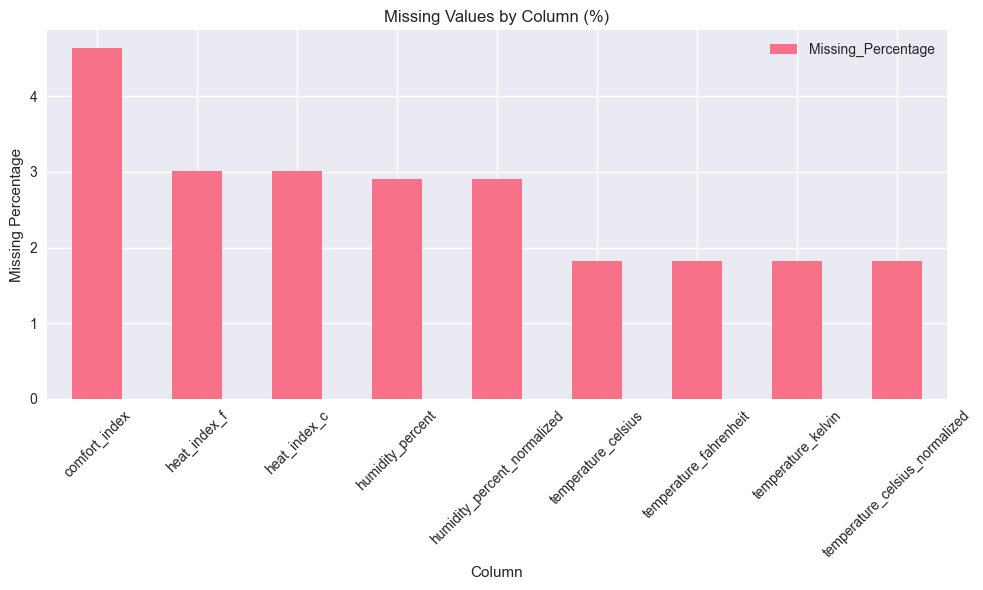

🔧 MISSING VALUES TREATMENT
1️⃣ Forward Fill Strategy:
   temperature_celsius: Filled 261 values using forward fill
   humidity_percent: Filled 419 values using forward fill
   temperature_fahrenheit: Filled 261 values using forward fill
   temperature_kelvin: Filled 261 values using forward fill
   temperature_celsius_normalized: Filled 261 values using forward fill
   humidity_percent_normalized: Filled 419 values using forward fill
\n2️⃣ Interpolation Strategy:
\n3️⃣ Statistical Imputation:
   temperature_celsius: Filled 1 values using statistical imputation
   temperature_fahrenheit: Filled 1 values using statistical imputation
   temperature_kelvin: Filled 1 values using statistical imputation
   temperature_celsius_normalized: Filled 1 values using statistical imputation
\n4️⃣ Domain-Specific Imputation:
\n✅ POST-IMPUTATION VALIDATION
Remaining missing values: 1539
Columns with remaining missing values: ['heat_index_f', 'heat_index_c', 'comfort_index']
\n💡 Options for remaining mi

In [11]:
# 10.1 Analyze missing values patterns
if not df_clean.empty:
    print("🔍 MISSING VALUES ANALYSIS")
    print("=" * 30)
    
    # Count missing values
    missing_summary = pd.DataFrame({
        'Column': df_clean.columns,
        'Missing_Count': [df_clean[col].isnull().sum() for col in df_clean.columns],
        'Missing_Percentage': [df_clean[col].isnull().sum() / len(df_clean) * 100 for col in df_clean.columns],
        'Data_Type': df_clean.dtypes.values
    })
    
    missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
    
    if len(missing_summary) > 0:
        print("Missing Values Summary:")
        print(missing_summary)
        print()
        
        # Visualize missing values pattern
        if len(missing_summary) <= 10:  # Only if manageable number of columns
            fig, ax = plt.subplots(figsize=(10, 6))
            missing_summary.plot(x='Column', y='Missing_Percentage', kind='bar', ax=ax)
            ax.set_title('Missing Values by Column (%)')
            ax.set_ylabel('Missing Percentage')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
    else:
        print("✅ No missing values detected!")
        print()
    
    # 10.2 Different imputation strategies
    print("🔧 MISSING VALUES TREATMENT")
    print("=" * 30)
    
    # Create a copy for imputation experiments
    df_imputed = df_clean.copy()
    
    # Strategy 1: Forward Fill (for time series)
    print("1️⃣ Forward Fill Strategy:")
    numeric_cols = df_imputed.select_dtypes(include=[np.number]).columns
    sensor_cols = [col for col in numeric_cols if any(x in col for x in ['temperature', 'humidity', 'pressure', 'aqi'])]
    
    if sensor_cols:
        # Forward fill within each sensor
        if 'sensor_id' in df_imputed.columns:
            for sensor_col in sensor_cols:
                before_ffill = df_imputed[sensor_col].isnull().sum()
                df_imputed[sensor_col] = df_imputed.groupby('sensor_id')[sensor_col].fillna(method='ffill')
                after_ffill = df_imputed[sensor_col].isnull().sum()
                filled = before_ffill - after_ffill
                if filled > 0:
                    print(f"   {sensor_col}: Filled {filled} values using forward fill")
    
    # Strategy 2: Interpolation (for time series)
    print("\\n2️⃣ Interpolation Strategy:")
    for sensor_col in sensor_cols:
        if df_imputed[sensor_col].isnull().sum() > 0:
            before_interp = df_imputed[sensor_col].isnull().sum()
            
            if 'sensor_id' in df_imputed.columns:
                # Interpolate within each sensor group
                df_imputed[sensor_col] = df_imputed.groupby('sensor_id')[sensor_col].transform(
                    lambda x: x.interpolate(method='linear')
                )
            else:
                df_imputed[sensor_col] = df_imputed[sensor_col].interpolate(method='linear')
            
            after_interp = df_imputed[sensor_col].isnull().sum()
            filled = before_interp - after_interp
            if filled > 0:
                print(f"   {sensor_col}: Filled {filled} values using interpolation")
    
    # Strategy 3: Statistical imputation (mean/median by group)
    print("\\n3️⃣ Statistical Imputation:")
    for sensor_col in sensor_cols:
        if df_imputed[sensor_col].isnull().sum() > 0:
            before_stat = df_imputed[sensor_col].isnull().sum()
            
            if 'location' in df_imputed.columns:
                # Use location-based mean
                location_means = df_imputed.groupby('location')[sensor_col].mean()
                df_imputed[sensor_col] = df_imputed[sensor_col].fillna(
                    df_imputed['location'].map(location_means)
                )
            else:
                # Use overall mean
                overall_mean = df_imputed[sensor_col].mean()
                df_imputed[sensor_col] = df_imputed[sensor_col].fillna(overall_mean)
            
            after_stat = df_imputed[sensor_col].isnull().sum()
            filled = before_stat - after_stat
            if filled > 0:
                print(f"   {sensor_col}: Filled {filled} values using statistical imputation")
    
    # Strategy 4: Domain-specific imputation
    print("\\n4️⃣ Domain-Specific Imputation:")
    
    # For categorical variables like status
    if 'status' in df_imputed.columns and df_imputed['status'].isnull().sum() > 0:
        before_status = df_imputed['status'].isnull().sum()
        # Assume missing status means 'active'
        df_imputed['status'] = df_imputed['status'].fillna('active')
        print(f"   status: Filled {before_status} missing status with 'active'")
    
    # For air quality categories
    if 'aqi_category' in df_imputed.columns and df_imputed['aqi_category'].isnull().sum() > 0:
        before_aqi_cat = df_imputed['aqi_category'].isnull().sum()
        # Re-derive from AQI values if available
        if 'air_quality_aqi' in df_imputed.columns:
            mask = df_imputed['aqi_category'].isnull()
            df_imputed.loc[mask, 'aqi_category'] = df_imputed.loc[mask, 'air_quality_aqi'].apply(
                lambda x: 'Good' if x <= 50 else 'Moderate' if x <= 100 else 'Unhealthy'
            )
            after_aqi_cat = df_imputed['aqi_category'].isnull().sum()
            filled = before_aqi_cat - after_aqi_cat
            print(f"   aqi_category: Re-derived {filled} categories from AQI values")
    
    # 10.3 Validation after imputation
    print("\\n✅ POST-IMPUTATION VALIDATION")
    print("=" * 35)
    
    remaining_missing = df_imputed.isnull().sum().sum()
    print(f"Remaining missing values: {remaining_missing}")
    
    if remaining_missing > 0:
        remaining_cols = df_imputed.columns[df_imputed.isnull().any()].tolist()
        print(f"Columns with remaining missing values: {remaining_cols}")
        
        # Show options for remaining missing values
        print("\\n💡 Options for remaining missing values:")
        print("   - Drop rows with missing values")
        print("   - Drop columns with too many missing values")
        print("   - Use advanced imputation methods (KNN, etc.)")
    else:
        print("🎉 All missing values have been handled!")
    
    # Compare before and after
    print("\\n📊 BEFORE vs AFTER Comparison:")
    comparison = pd.DataFrame({
        'Column': sensor_cols,
        'Original_Missing': [df_clean[col].isnull().sum() for col in sensor_cols],
        'After_Imputation': [df_imputed[col].isnull().sum() for col in sensor_cols]
    })
    print(comparison)
    
    # Save the imputed dataset for later use
    df_final = df_imputed.copy()
    print("\\n✅ Final dataset prepared for export!")
    
else:
    print("❌ Tidak dapat melakukan missing value treatment - dataset kosong")

## 11. Export Processed Data (LOAD)
Terakhir, mari export data yang sudah diproses ke berbagai format untuk penggunaan selanjutnya.

In [12]:
# 11.1 Export to various formats
if 'df_final' in locals() and not df_final.empty:
    print("💾 EXPORTING PROCESSED DATA")
    print("=" * 30)
    
    # Create output directory if it doesn't exist
    import os
    output_dir = 'data/output'
    os.makedirs(output_dir, exist_ok=True)
    
    # Generate timestamp for file naming
    from datetime import datetime
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # 11.1.1 Export to CSV
    print("📄 Exporting to CSV...")
    csv_filename = f"{output_dir}/processed_sensor_data_{timestamp}.csv"
    df_final.to_csv(csv_filename, index=False)
    print(f"   ✅ Saved: {csv_filename}")
    
    # 11.1.2 Export to Excel with multiple sheets
    print("\\n📊 Exporting to Excel (multiple sheets)...")
    excel_filename = f"{output_dir}/sensor_analysis_{timestamp}.xlsx"
    
    with pd.ExcelWriter(excel_filename, engine='openpyxl') as writer:
        # Main processed data
        df_final.to_excel(writer, sheet_name='Processed_Data', index=False)
        
        # Summary statistics
        summary_stats = df_final.describe()
        summary_stats.to_excel(writer, sheet_name='Summary_Statistics')
        
        # Location summary (if available)
        if 'location' in df_final.columns:
            location_summary = df_final.groupby('location').agg({
                'temperature_celsius': ['mean', 'min', 'max'],
                'humidity_percent': ['mean', 'min', 'max'],
                'air_quality_aqi': 'mean'
            }).round(2)
            location_summary.to_excel(writer, sheet_name='Location_Summary')
        
        # Daily aggregation (if timestamp available)
        if 'timestamp' in df_final.columns:
            daily_agg = df_final.groupby(df_final['timestamp'].dt.date).agg({
                'temperature_celsius': 'mean',
                'humidity_percent': 'mean',
                'air_quality_aqi': 'mean'
            }).round(2)
            daily_agg.to_excel(writer, sheet_name='Daily_Averages')
    
    print(f"   ✅ Saved: {excel_filename}")
    
    # 11.1.3 Export to JSON
    print("\\n🔗 Exporting to JSON...")
    json_filename = f"{output_dir}/processed_sensor_data_{timestamp}.json"
    
    # Convert datetime columns to string for JSON serialization
    df_json = df_final.copy()
    for col in df_json.columns:
        if df_json[col].dtype == 'datetime64[ns]':
            df_json[col] = df_json[col].dt.strftime('%Y-%m-%d %H:%M:%S')
        elif pd.api.types.is_categorical_dtype(df_json[col]):
            df_json[col] = df_json[col].astype(str)
    
    df_json.to_json(json_filename, orient='records', indent=2)
    print(f"   ✅ Saved: {json_filename}")
    
    # 11.1.4 Export to Parquet (efficient for large datasets)
    print("\\n🗜️ Exporting to Parquet...")
    try:
        parquet_filename = f"{output_dir}/processed_sensor_data_{timestamp}.parquet"
        df_final.to_parquet(parquet_filename, index=False)
        print(f"   ✅ Saved: {parquet_filename}")
    except ImportError:
        print("   ⚠️ Parquet export requires 'pyarrow' or 'fastparquet'. Install with: pip install pyarrow")
    
    # 11.2 Export aggregated summaries
    print("\\n📋 EXPORTING SUMMARY REPORTS")
    print("=" * 35)
    
    # 11.2.1 Data Quality Report
    quality_report = pd.DataFrame({
        'Metric': [
            'Total Records',
            'Date Range',
            'Unique Sensors', 
            'Unique Locations',
            'Missing Values',
            'Duplicate Records (removed)',
            'Processing Timestamp'
        ],
        'Value': [
            len(df_final),
            f"{df_final['timestamp'].min()} to {df_final['timestamp'].max()}" if 'timestamp' in df_final.columns else 'N/A',
            df_final['sensor_id'].nunique() if 'sensor_id' in df_final.columns else 'N/A',
            df_final['location'].nunique() if 'location' in df_final.columns else 'N/A',
            df_final.isnull().sum().sum(),
            f"{len(df_main) - len(df_final)} removed" if 'df_main' in locals() else 'N/A',
            datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        ]
    })
    
    quality_filename = f"{output_dir}/data_quality_report_{timestamp}.csv"
    quality_report.to_csv(quality_filename, index=False)
    print(f"📊 Quality Report: {quality_filename}")
    
    # 11.2.2 Column Metadata
    metadata = pd.DataFrame({
        'Column': df_final.columns,
        'Data_Type': df_final.dtypes.astype(str),
        'Non_Null_Count': df_final.count(),
        'Null_Count': df_final.isnull().sum(),
        'Unique_Values': [df_final[col].nunique() for col in df_final.columns],
        'Sample_Values': [str(df_final[col].dropna().iloc[:3].tolist()) if len(df_final[col].dropna()) > 0 else 'N/A' for col in df_final.columns]
    })
    
    metadata_filename = f"{output_dir}/column_metadata_{timestamp}.csv"
    metadata.to_csv(metadata_filename, index=False)
    print(f"📝 Column Metadata: {metadata_filename}")
    
    # 11.3 Export configuration for reproducibility
    print("\\n⚙️ EXPORTING PROCESSING CONFIG")
    print("=" * 35)
    
    processing_config = {
        'processing_timestamp': datetime.now().isoformat(),
        'original_data_shape': list(df_main.shape) if 'df_main' in locals() else [0, 0],
        'final_data_shape': list(df_final.shape),
        'processing_steps': [
            'Data extraction from multiple formats',
            'Duplicate removal',
            'Column standardization',
            'Time series processing',
            'Feature engineering',
            'Missing value imputation',
            'Data validation'
        ],
        'feature_engineering': [
            'Temperature conversions (F, K)',
            'Heat index calculation',
            'Air quality categorization',
            'Comfort index creation',
            'Time-based features',
            'Rolling averages'
        ],
        'data_quality': {
            'duplicates_removed': len(df_main) - len(df_final) if 'df_main' in locals() else 0,
            'missing_values_imputed': True,
            'outliers_detected': True
        }
    }
    
    config_filename = f"{output_dir}/processing_config_{timestamp}.json"
    with open(config_filename, 'w') as f:
        json.dump(processing_config, f, indent=2)
    print(f"⚙️ Processing Config: {config_filename}")
    
    # Final summary
    print("\\n🎉 ETL PIPELINE COMPLETED!")
    print("=" * 30)
    print(f"📊 Processed {len(df_final):,} sensor records")
    print(f"🏷️ Created {len(df_final.columns)} features")
    print(f"📁 Generated {5} output files")
    print(f"📅 Processing completed at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    
    print("\\n📁 Output files created:")
    output_files = [
        csv_filename,
        excel_filename,
        json_filename,
        quality_filename,
        metadata_filename,
        config_filename
    ]
    
    for file in output_files:
        if os.path.exists(file):
            size_mb = os.path.getsize(file) / (1024*1024)
            print(f"   📄 {os.path.basename(file)} ({size_mb:.2f} MB)")
    
else:
    print("❌ No processed data available for export")

💾 EXPORTING PROCESSED DATA
📄 Exporting to CSV...
   ✅ Saved: data/output/processed_sensor_data_20250929_101026.csv
\n📊 Exporting to Excel (multiple sheets)...
   ✅ Saved: data/output/sensor_analysis_20250929_101026.xlsx
\n🔗 Exporting to JSON...
   ✅ Saved: data/output/processed_sensor_data_20250929_101026.json
\n🗜️ Exporting to Parquet...
   ✅ Saved: data/output/processed_sensor_data_20250929_101026.parquet
\n📋 EXPORTING SUMMARY REPORTS
📊 Quality Report: data/output/data_quality_report_20250929_101026.csv
📝 Column Metadata: data/output/column_metadata_20250929_101026.csv
\n⚙️ EXPORTING PROCESSING CONFIG
⚙️ Processing Config: data/output/processing_config_20250929_101026.json
\n🎉 ETL PIPELINE COMPLETED!
📊 Processed 14,416 sensor records
🏷️ Created 28 features
📁 Generated 5 output files
📅 Processing completed at: 2025-09-29 10:10:31
\n📁 Output files created:
   📄 processed_sensor_data_20250929_101026.csv (3.62 MB)
   📄 sensor_analysis_20250929_101026.xlsx (2.38 MB)
   📄 processed_sensor_

## 🎯 Kesimpulan dan Next Steps

Selamat! Anda telah menyelesaikan tutorial hands-on ETL untuk data sensor menggunakan Pandas. 

### ✅ Yang Telah Dipelajari:
1. **Extract**: Membaca data dari berbagai format (CSV, Excel, JSON)
2. **Transform**: 
   - Data cleaning dan preprocessing
   - Time series handling
   - Feature engineering
   - Aggregation dan grouping
   - Missing value treatment
3. **Load**: Export ke berbagai format output

### 🚀 Next Steps:
1. **Advanced Analytics**: Gunakan data yang sudah diproses untuk:
   - Time series forecasting
   - Anomaly detection
   - Statistical analysis
   
2. **Automation**: Buat ETL pipeline yang berjalan otomatis
3. **Visualization**: Buat dashboard untuk monitoring sensor
4. **Machine Learning**: Gunakan data untuk predictive modeling

### 📚 Resources Tambahan:
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Time Series Analysis with Pandas](https://pandas.pydata.org/docs/user_guide/timeseries.html)
- [Data Cleaning Best Practices](https://pandas.pydata.org/docs/user_guide/missing_data.html)

Terima kasih telah mengikuti tutorial ini! 🙏

### 💭 A. Pertanyaan Essay

**1. Jelaskan perbedaan antara Forward Fill dan Interpolation dalam menangani missing values pada data time series. Kapan sebaiknya menggunakan masing-masing metode?**

**2. Mengapa normalisasi data penting dalam preprocessing data sensor? Berikan contoh kasus dimana normalisasi diperlukan.**

**3. Sebutkan dan jelaskan 3 metode deteksi outlier yang bisa digunakan untuk data sensor. Apa kelebihan dan kekurangan masing-masing?**

**4. Bagaimana cara memvalidasi kualitas hasil ETL pipeline? Sebutkan minimal 5 metrik yang bisa digunakan.**

**5. Jelaskan pentingnya feature engineering dalam preprocessing data sensor. Berikan 3 contoh feature yang bisa dibuat dari data suhu dan kelembaban.**

### 🏋️ B. Latihan Praktis (Hands-On Challenges)

Sekarang saatnya menguji kemampuan coding Anda! Kerjakan latihan-latihan berikut menggunakan data yang sudah diproses.

#### 💪 Challenge 1: Data Quality Analysis
**Tugas**: Buat function untuk menghitung comprehensive data quality score yang mencakup:
- Completeness (% data yang tidak missing)
- Validity (% data dalam range yang valid)  
- Consistency (% data yang konsisten formatnya)
- Uniqueness (% data yang tidak duplikat)

**Target**: Function harus return dictionary dengan score 0-100 untuk setiap metrik.

In [ ]:
# Challenge 1: Implementasi Data Quality Score Function
# TODO: Lengkapi function berikut

def calculate_data_quality_comprehensive(df):
    """
    Hitung comprehensive data quality score
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame yang akan dianalisis
        
    Returns:
    --------
    dict : Dictionary dengan quality scores
    """
    
    quality_scores = {}
    
    # 1. COMPLETENESS SCORE
    # TODO: Hitung persentase data yang tidak missing
    total_cells = df.size
    missing_cells = df.isnull().sum().sum()
    quality_scores['completeness'] = 0  # REPLACE THIS LINE
    
    # 2. VALIDITY SCORE  
    # TODO: Hitung persentase data sensor dalam range valid
    # Gunakan range: temp (-50,60), humidity (0,100), pressure (900,1100), aqi (0,500)
    valid_ranges = {
        'temperature_celsius': (-50, 60),
        'humidity_percent': (0, 100),
        'pressure_hpa': (900, 1100),
        'air_quality_aqi': (0, 500)
    }
    
    validity_scores = []
    # TODO: Implementasi validity check untuk setiap kolom
    
    quality_scores['validity'] = 0  # REPLACE THIS LINE
    
    # 3. UNIQUENESS SCORE
    # TODO: Hitung persentase data yang tidak duplikat
    quality_scores['uniqueness'] = 0  # REPLACE THIS LINE
    
    # 4. CONSISTENCY SCORE
    # TODO: Check format consistency (contoh: semua location dalam Title Case)
    quality_scores['consistency'] = 0  # REPLACE THIS LINE
    
    # 5. OVERALL SCORE (weighted average)
    weights = {'completeness': 0.3, 'validity': 0.3, 'uniqueness': 0.2, 'consistency': 0.2}
    quality_scores['overall'] = sum(quality_scores[key] * weights[key] for key in weights.keys())
    
    return quality_scores

# Test your function (uncomment when ready)
# if 'df_final' in locals():
#     scores = calculate_data_quality_comprehensive(df_final)
#     print("Data Quality Scores:")
#     for metric, score in scores.items():
#         print(f"  {metric.title()}: {score:.2f}%")